<a href="https://colab.research.google.com/github/sahanediriweera/EE7204ComputerVisionAndImageProcessing/blob/main/Image_Processing_Take_Home_Assignment_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

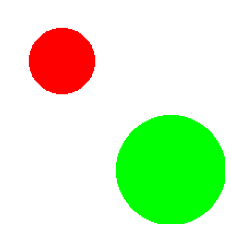

In [20]:
from PIL import Image, ImageDraw
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


img_size = (200, 200)
background_color = (255, 255, 255)


circle_color1 = (255, 0, 0) 
circle_color2 = (0, 255, 0) 

img = Image.new('RGB', img_size, background_color)
draw = ImageDraw.Draw(img)


circle1_center = (50, 50)
circle1_radius = 30
draw.ellipse((circle1_center[0]-circle1_radius, circle1_center[1]-circle1_radius, circle1_center[0]+circle1_radius, circle1_center[1]+circle1_radius), fill=circle_color1)
circle2_center = (150, 150)
circle2_radius = 50
draw.ellipse((circle2_center[0]-circle2_radius, circle2_center[1]-circle2_radius, circle2_center[0]+circle2_radius, circle2_center[1]+circle2_radius), fill=circle_color2)


plt.imshow(img)
plt.axis('off')
plt.show()

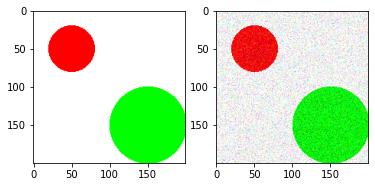

In [21]:
img = np.asarray(img)
mean = 0
stddev = 40
noise = np.random.normal(mean, stddev, img.shape)
noisy_img_arr = np.clip(img + noise, 0, 255).astype(np.uint8)

f,arr = plt.subplots(1,2)
arr[0].imshow(img)
arr[1].imshow(noisy_img_arr)

In [22]:
bins_num = 256
 

hist, bin_edges = np.histogram(img, bins=bins_num)
 
hist = np.divide(hist.ravel(), hist.max())
 

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
index_of_max_val = np.argmax(inter_class_variance)
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  0.498046875
